## Support Vector Machine 실습코드

 https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine
 
 위 사이트 및 지난 기수(특히 12기 박진혁님!)의 코드를 참조하였습니다. 

## 1. SVM 시각화 실습

In [ ]:
# generate dataset
# make moon은 달모양의 데이터 분포를 생성해주는 함수입니다. 달모양 데이터가 어떻게 분류되는지 봅시당
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

X,y=make_moons(noise=0.1, random_state=2) # 반달 두 개 엎어 놓은 모양의 데이터 분포를 형성해주는 라이브러리
data = pd.DataFrame(data = X, columns=['x1','x2']) # x 데이터는 2차원
data['y']=y #타겟변수 분리
data.head()

x1        x2  y
0  1.327241 -0.222425  1
1 -0.429116  1.071136  0
2  0.014901  0.003679  1
3  0.000352  1.087226  0
4  0.676553  0.857039  0

In [ ]:
#Support Vector Machine은 스케일링이 필수라고 보시면 됩니다. ('거리'라는 요소를 사용하는 KNN SVM 등은 Scaling을 해주셔야 합니다)
scaler = StandardScaler() #정규화를 하자!
Xstan = scaler.fit_transform(X) # 스케일링을 해주자!

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel 

In [ ]:
svc=SVC(kernel='linear', C = 100) #linear한 SVM 적용 해보자 에러페널티는 높게주고
svc.fit(Xstan,y) # 모델 트레이닝 하는 코드

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
#공식문서에 있는 hyperplane 그려주는 method를 약간 수정한 함수
def draw_hyperplane(model, X, y):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
            linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('x1', fontsize = 18)
    plt.ylabel('x2', fontsize = 18)
    plt.show()

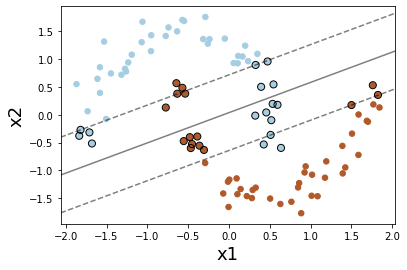

In [ ]:
draw_hyperplane(svc,Xstan,y) #굵은 부분은 서포트벡터 + 에러난 벡터 

In [ ]:
#case for gaussian kernel C = 100 : overfitting
svc_2=SVC(kernel='rbf', gamma = 1, C = 100)
svc_2.fit(Xstan,y)
draw_hyperplane(svc_2,Xstan,y)

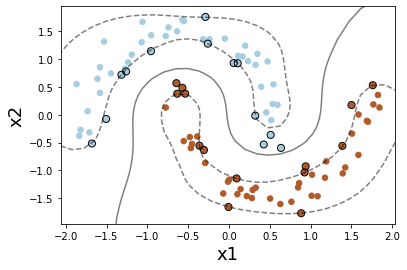

In [ ]:
#case for gaussian kernel C = 1 : underfitting
svc_2=SVC(kernel='rbf', gamma = 1, C = 1)
svc_2.fit(Xstan,y)
draw_hyperplane(svc_2,Xstan,y)

In [ ]:
#case for gaussian kernel gamma = 5 : overfitting
svc_2=SVC(kernel='rbf', gamma = 5, C = 1)
svc_2.fit(Xstan,y)
draw_hyperplane(svc_2,Xstan,y)

## 구입여부 예측 실습

In [ ]:
#10기 과제로 촐제된 데이터 셋을 사용하였습니다.
#SN_ad = pd.read_csv('./week3_svm/SN_ad.csv')
#SN_ad = pd.read_csv('SN_ad.csv')

In [ ]:
SN_ad.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [ ]:
SN_ad.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#총 라벨 수 확인
print("Total number of labels: {}".format(SN_ad.shape[0]))
print("Number of male: {}".format(SN_ad[SN_ad.Purchased == 0].shape[0]))
print("Number of female: {}".format(SN_ad[SN_ad.Purchased == 1].shape[0]))

Total number of labels: 400
Number of male: 257
Number of female: 143


In [ ]:
#쓸모없는 User ID 정보 삭제
SN_ad = SN_ad.drop('User ID',axis = 1)

In [ ]:
SN_ad.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
#Male Female을 숫자로
def transform_to_integer(x):
    if x=='Male':
        return 0
    elif x=='Female':
        return 1

In [ ]:
SN_ad['Gender'] = SN_ad['Gender'].apply(transform_to_integer)

In [ ]:
X = SN_ad.iloc[:,:-1] # X
y = SN_ad.iloc[:,-1] # y

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
#거리를 쓰는 데이터는? 스케일링해 주는 것이 좋다!
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [ ]:
from sklearn import metrics #model evaluation하는 라이브러리
svc=SVC(kernel='linear') # linear model
svc.fit(X_train,y_train) # model training
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어

Accuracy Score:
0.825


In [ ]:
svc_rbf=SVC(kernel='rbf', gamma = 1) #rbf kernel
svc_rbf.fit(X_train,y_train) # model training
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.875


In [ ]:
from tqdm import tqdm
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격
acc_score = [] # 결과 보관할 list

#cross validation도 해보자
for c in tqdm(C_range): 
    svc = SVC(kernel='rbf', C=c, gamma = 'scale') #gamma에 default 값을 scale로 안해주면 워닝이 어마무시하게 뜬다..!
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 16.26it/s]


0.905
1


Text(0, 0.5, 'Cross-Validated Accuracy')

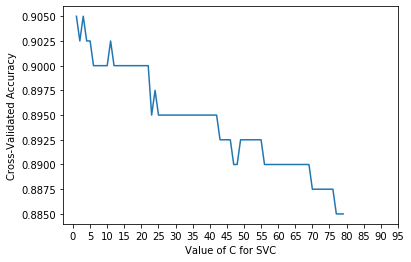

In [ ]:
#커질수록 떨어진다
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
C_range=list(np.arange(1,30,0.1))
acc_score = []
for c in tqdm(C_range):
    svc = SVC(kernel='rbf',gamma = 'scale', C=c)
    svc.fit(X_train,y_train)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|████████████████████████████████████████████████████████████████████████████████| 290/290 [00:12<00:00, 22.20it/s]


0.9075
4.3000000000000025


In [ ]:
# 각 하이퍼 파라미터 별로 값이 얼만지 그려서 확인해보자
C_range=list(np.arange(1,30,0.1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,30,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

In [ ]:
#C는 4.3일때 최대값이다
C_range[np.argmax(acc_score)]

4.3000000000000025

In [ ]:
tuned_parameters = {
 'C': (np.arange(3,5,0.2)), 'kernel': ['linear'],
 'C': (np.arange(3,5,0.2)), 'gamma': (np.arange(1,5.1)), 'kernel': ['rbf']
                   }

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy', verbose = 3)
# 모델과 tuned parameter를 집어넣음! 그리고 verbose는 진행상황을 나타내주는 파라미터로 크면클수록 정보를많이줌
# 이건 default로 두면 > 데이터셋 커지는 경우에 내 코드/컴퓨터/파이썬 중 뭐가 이상한건지 찾기 힘들어집니당

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.969, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.844, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.938, total=   0.0s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.906, total=   0.0s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=3.0, gamma=1.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C

[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.938, total=   0.0s
[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.906, total=   0.0s
[CV] C=3.4000000000000004, gamma=2.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=2.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=3.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=3.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=3.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=3.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=3.4000000000000004, gamma=3.0, kernel=rbf .....................
[CV]  C=3.4000000000000004, gamma=3

[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.906, total=   0.0s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.906, total=   0.0s
[CV] C=3.8000000000000007, gamma=3.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=3.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=3.8000000000000007, gamma=4.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=4.0, kernel=rbf, score=0.938, total=   0.0s
[CV] C=3.8000000000000007, gamma=4.0, kernel=rbf .....................
[CV]  C=3.8000000000000007, gamma=4

[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.938, total=   0.0s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.906, total=   0.0s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=4.200000000000001, gamma=4.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=4.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=4.200000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=5.0, kernel=rbf, score=0.938, total=   0.0s
[CV] C=4.200000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.200000000000001, gamma=5.0, ker

[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.938, total=   0.0s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.844, total=   0.0s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.844, total=   0.0s
[CV] C=4.600000000000001, gamma=5.0, kernel=rbf ......................
[CV]  C=4.600000000000001, gamma=5.0, kernel=rbf, score=0.875, total=   0.0s
[CV] C=4.800000000000002, gamma=1.0, kernel=rbf ......................
[CV]  C=4.800000000000002, gamma=1.0, kernel=rbf, score=0.969, total=   0.0s
[CV] C=4.800000000000002, gamma=1.0, kernel=rbf ......................
[CV]  C=4.800000000000002, gamma=1.0, ker

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.6s finished


0.921875


In [ ]:
print(model_svm.best_params_) # 최고의 결과가 나온 경우

{'C': 3.0, 'gamma': 3.0, 'kernel': 'rbf'}


In [ ]:
svm_temp = SVC(kernel = 'rbf', gamma = 3.0, C = 3.0)

In [ ]:
svm_temp.fit(X_train,y_train)
y_pred = svm_temp.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.85
